interpretation
https://stackoverflow.com/questions/65488361/python-granger-causality-f-test-understanding

In [5]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import statsmodels 
import statsmodels.api as sm

In [7]:
plt.rc('font', family='AppleGothic')

In [55]:
# buy = pd.read_csv('./data/buy_day.csv', index_col=0)
buy = pd.read_csv('./target.csv', index_col=0)
sns = pd.read_csv('./data/sns_day.csv', index_col=0)

<AxesSubplot:xlabel='date'>

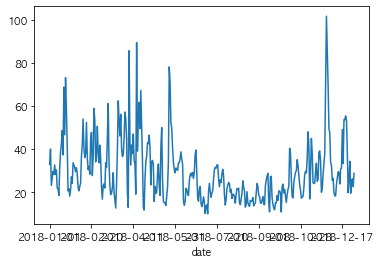

In [61]:
buy['미세먼지'].iloc[:365].plot()

<AxesSubplot:xlabel='date'>

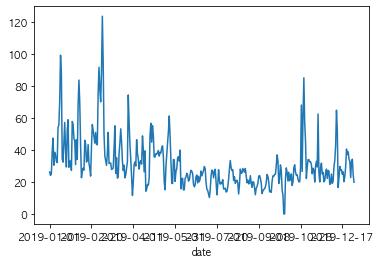

In [62]:
buy['미세먼지'].iloc[365:].plot()

/Users/yunsoowoo/miniforge3/envs/prj_final/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yunsoowoo/miniforge3/envs/prj_final/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


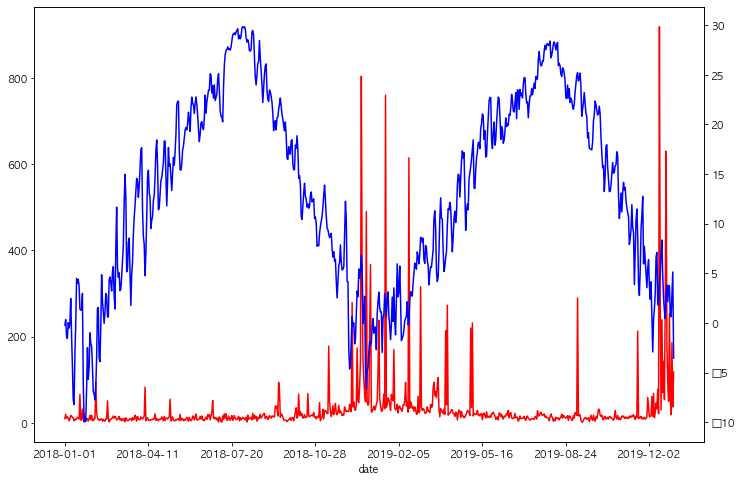

In [74]:
expm1 = buy['랍스타']
log1p = buy['평균기온']
fig, ax0 = plt.subplots(figsize=(12, 8))
ax1 = ax0.twinx()

expm1.plot(kind='line', ax=ax0, color='red')
log1p.plot(kind='line', ax=ax1, color='blue')
plt.show()

In [41]:
drop = sns.columns[-12:-1]
sns.drop(drop, axis=1, inplace=True)
buy = buy.iloc[:, 3:]

In [52]:
products = buy.columns.to_list()
sns = sns.loc[:, sns.columns.isin(products)]

In [12]:
from statsmodels.tsa.stattools import grangercausalitytests

def GRANGER_buy(buy, sns, cat, lag=7): # 구매량이 영향을 받는다고 가정
    buy_cat = buy[[cat]]
    buy_cat.rename(columns={cat:'buy'}, inplace=True)

    sns_cat = sns[[cat]]
    sns_cat.rename(columns={cat:'cnt'}, inplace=True)

    df = pd.concat([buy_cat, sns_cat], axis=1)

    return grangercausalitytests(df, lag)


def GRANGER_sns(buy, sns, cat, lag=7): # 언급량이 영향을 받는다고 가정
    buy_cat = buy[[cat]]
    buy_cat.rename(columns={cat:'buy'}, inplace=True)

    sns_cat = sns[[cat]]
    sns_cat.rename(columns={cat:'cnt'}, inplace=True)

    df = pd.concat([sns_cat, buy_cat], axis=1) # 앞에 있는 게 영향 받음

    return grangercausalitytests(df, lag)

선스프레이 
*빨간선이 구매량, 파랑선이 언급량


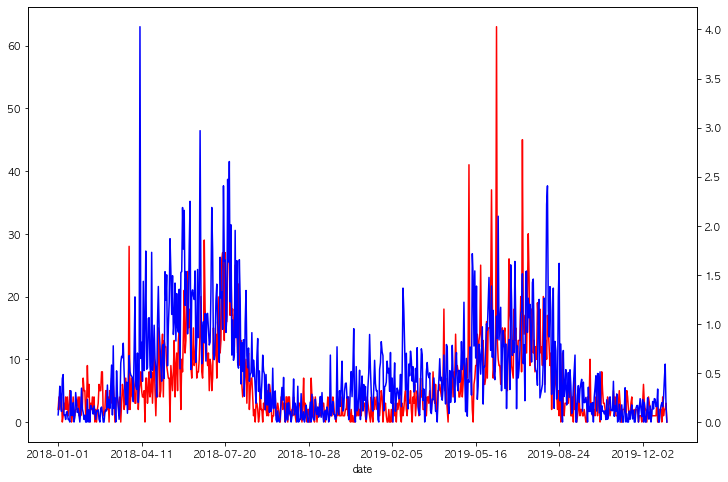

/Users/yunsoowoo/miniforge3/envs/prj_final/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,buy,cnt
date,,
2018-01-01,2,0.072937
2018-01-02,4,0.189933
2018-01-03,2,0.364804
2018-01-04,3,0.256421
2018-01-05,4,0.107732
...,...,...
2019-12-27,1,0.240974
2019-12-28,2,0.432791
2019-12-29,2,0.590141


In [21]:
cat = '선스프레이'

print(cat, '\n*빨간선이 구매량, 파랑선이 언급량')

buy_cat = buy[[cat]]
buy_cat.rename(columns={cat:'buy'}, inplace=True)

sns_cat = sns[[cat]]
sns_cat.rename(columns={cat:'cnt'}, inplace=True)

df = pd.concat([buy_cat, sns_cat], axis=1)
df

# grangercausalitytests(df, lag)


# print('언급량 -> 구매량 =====================================')
# GRANGER_buy(buy, sns, cat)

In [13]:
def compare(buy, sns, cat):
    print(cat, '\n*빨간선이 구매량, 파랑선이 언급량')
    
    expm1 = buy[cat]
    log1p = sns[cat]
    fig, ax0 = plt.subplots(figsize=(12, 8))
    ax1 = ax0.twinx()
    
    expm1.plot(kind='line', ax=ax0, color='red')
    log1p.plot(kind='line', ax=ax1, color='blue')
    plt.show()
    
    print('언급량 -> 구매량 =====================================')
    GRANGER_buy(buy, sns, cat)


선스프레이 
*빨간선이 구매량, 파랑선이 언급량


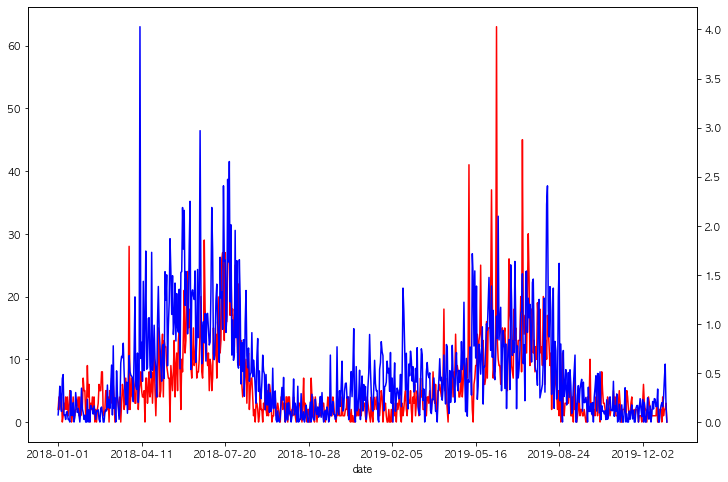

언급량 -> 구매량 =====================================

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=52.4918 , p=0.0000  , df_denom=726, df_num=1
ssr based chi2 test:   chi2=52.7087 , p=0.0000  , df=1
likelihood ratio test: chi2=50.8904 , p=0.0000  , df=1
parameter F test:         F=52.4918 , p=0.0000  , df_denom=726, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=20.6899 , p=0.0000  , df_denom=723, df_num=2
ssr based chi2 test:   chi2=41.6659 , p=0.0000  , df=2
likelihood ratio test: chi2=40.5172 , p=0.0000  , df=2
parameter F test:         F=20.6899 , p=0.0000  , df_denom=723, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.5579  , p=0.0000  , df_denom=720, df_num=3
ssr based chi2 test:   chi2=28.9525 , p=0.0000  , df=3
likelihood ratio test: chi2=28.3908 , p=0.0000  , df=3
parameter F test:         F=9.5579  , p=0.0000  , df_denom=720, df_num=3

Granger Causality
number of lags (no zero) 4

/Users/yunsoowoo/miniforge3/envs/prj_final/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [14]:
compare(buy, sns, '선스프레이')

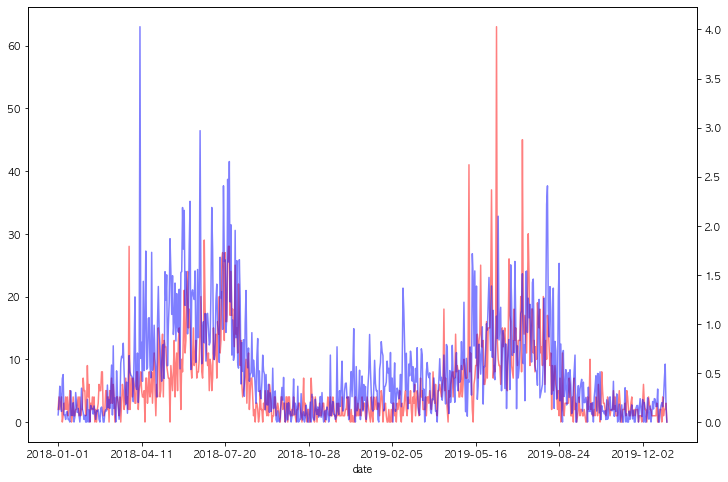

In [31]:

# def draw(buy, sns, cat):
cat = '선스프레이'
expm1 = buy[cat]
log1p = sns[cat]
fig, ax0 = plt.subplots(figsize=(12, 8))
ax1 = ax0.twinx()

expm1.plot(kind='line', ax=ax0, color='red', alpha=0.5)
log1p.plot(kind='line', ax=ax1, color='blue', alpha=0.5)
plt.show()